# 🌸 Iris Dataset – Classification Analysis

---

## 🧑‍💻 Designed & Prepared By
**Muhammad Anas**

---

## 📌 Dataset Overview

The **Iris dataset** is one of the most popular and widely used datasets in machine learning.  
It contains measurements of iris flowers and is mainly used for **multi-class classification problems**.

The dataset includes three different species of iris flowers:
- Iris-setosa
- Iris-versicolor
- Iris-virginica

---

## 📊 Dataset Metadata

- **Dataset Name:** Iris Dataset  
- **Source:** Scikit-learn  
- **Problem Type:** Classification  
- **Number of Samples:** 150  
- **Number of Features:** 4  
- **Number of Classes:** 3  

---

## 🗂️ Feature Description

| Feature Name | Description |
|-------------|-------------|
| **Sepal Length** | Length of the sepal (cm) |
| **Sepal Width** | Width of the sepal (cm) |
| **Petal Length** | Length of the petal (cm) |
| **Petal Width** | Width of the petal (cm) |
| **Target (Species)** | Flower species (Setosa, Versicolor, Virginica) |

---

## 🎯 Objective

The main objective of this project is to:
- Perform exploratory data analysis (EDA) on the Iris dataset
- Build a **classification model**
- Predict the species of an iris flower based on its measurements

---

## 🤖 Machine Learning Model

In this project, the **Support Vector Classifier (SVC)** is used to build a classification model.  
SVC is a supervised learning algorithm that works by finding the optimal decision boundary (hyperplane) that separates different classes with the maximum margin.

The model will be trained to classify iris flowers into the following species:
- Iris-setosa
- Iris-versicolor
- Iris-virginica



In [18]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Load dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
#checking the shape of dataset
shape=df.shape
print(f"The dataset contains {shape[0]} rows and {shape[1]} columns.")

The dataset contains 150 rows and 5 columns.


In [21]:
#checking for missing values
missing_values = df.isnull().sum()
missing_values.sort_values(ascending=False)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
#checking for the duplicated values
duplicated_values = df.duplicated().sum()
print(f"The dataset contains {duplicated_values} duplicated values.")

The dataset contains 1 duplicated values.


In [23]:
#removing duplicated values
df = df.drop_duplicates()

In [24]:
#checking for the duplicated values after removing them
duplicated_values = df.duplicated().sum()
print(f"The dataset contains {duplicated_values} duplicated values.")

The dataset contains 0 duplicated values.


In [25]:
#splitting the dataset into features and target variable
X = df.drop('species', axis=1)
y = df['species']

In [26]:
#split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# train the model 
model = SVC()
model.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [28]:
#predicting the test set results
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [29]:
#checking the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy*100:.2f}%")

Accuracy of the model: 100.00%


In [30]:
#using the evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



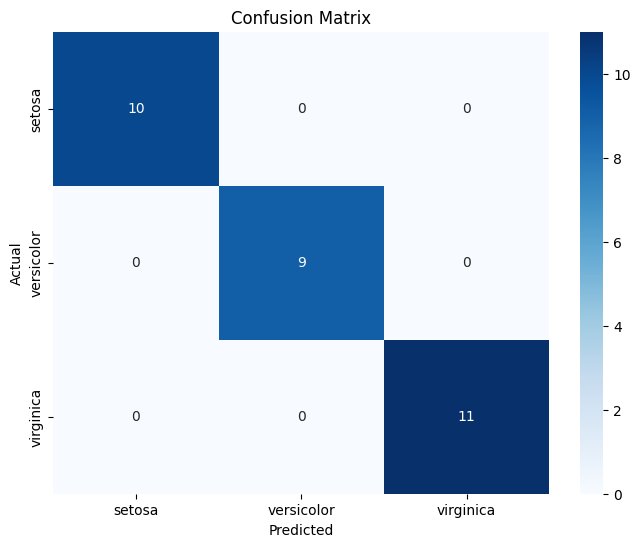

In [31]:
#plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()